VISUALIZATION

In [15]:
# Import library and dataframe
import pandas as pd
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv('../04.csv_clean/ufc_fight_results_clean.csv')

# Optional: Filter to a specific weight class to reduce subplots (e.g., 'Flyweight')
# df = df[df['WEIGHTCLASS'] == 'Flyweight']

df['WEIGHTCLASS'].unique()

array(['Bantamweight', 'Flyweight', 'Light Heavyweight', 'Lightweight',
       "Women's Flyweight", 'Middleweight', 'Featherweight',
       'Welterweight', 'Heavyweight', "Women's Strawweight",
       "Women's Bantamweight", 'Other', "Women's Featherweight"],
      dtype=object)

               Attribute  Positive Delta Win %  Positive Delta Lost %
0            REACH.DELTA              0.173769               0.826231
4       Str. Acc %.DELTA              0.340271               0.659729
8             SApM.DELTA              0.376288               0.623712
2              AGE.DELTA              0.416808               0.583192
6         TD Acc %.DELTA              0.419375               0.580625
5     TD Avg 15min.DELTA              0.420244               0.579756
9       Str. Def %.DELTA              0.420797               0.579203
3             SLpM.DELTA              0.422258               0.577742
1           HEIGHT.DELTA              0.456972               0.543028
10        TD Def %.DELTA              0.461751               0.538249
11      WIN_STREAK_DELTA              0.492990               0.507010
7   Sub. Avg 15min.DELTA              0.498835               0.501165
               Attribute  Positive Delta Win %  Positive Delta Lost %
11      WIN_STREAK_D

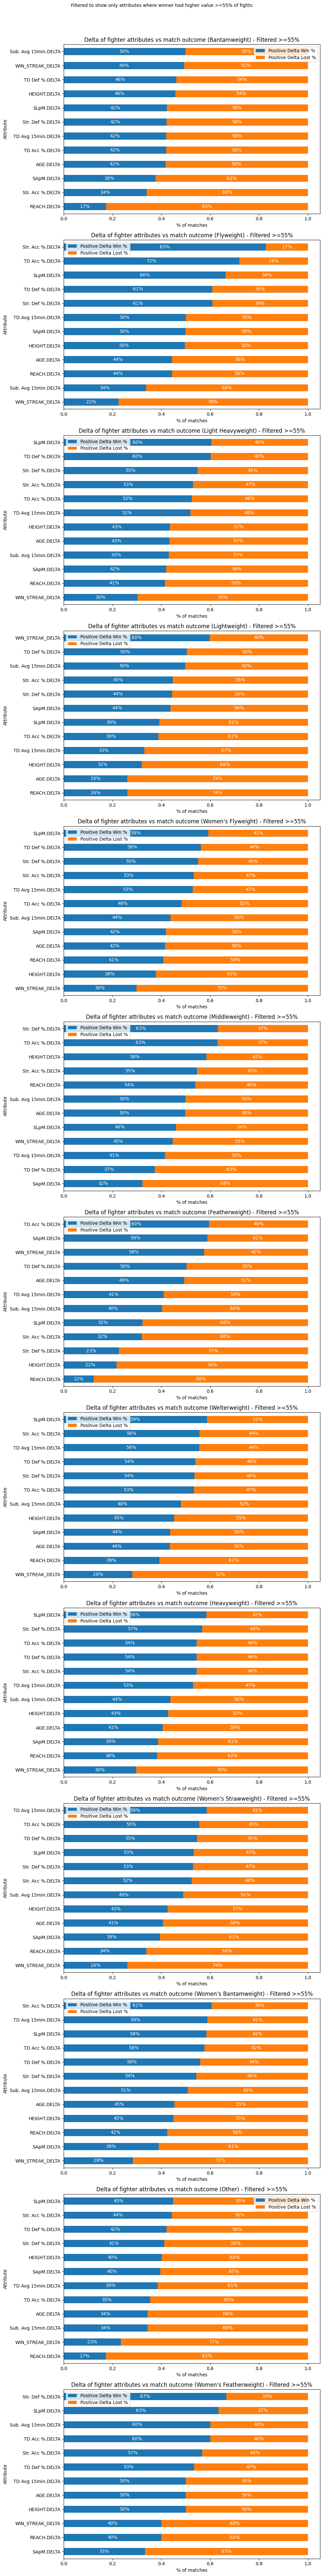

In [16]:
# List of delta attributes to analyze
delta_attributes = [
    'REACH.DELTA',
    'HEIGHT.DELTA',
    'AGE.DELTA',
    'SLpM.DELTA',
    'Str. Acc %.DELTA',
    'TD Avg 15min.DELTA',
    'TD Acc %.DELTA',
    'Sub. Avg 15min.DELTA',
    'SApM.DELTA',
    'Str. Def %.DELTA',
    'TD Def %.DELTA',
    'WIN_STREAK_DELTA'
]

# Clean the WEIGHTCLASS column (strip any whitespace)
df['WEIGHTCLASS'] = df['WEIGHTCLASS'].str.strip()

# Get unique weight classes
weight_classes = df['WEIGHTCLASS'].unique()

# Create the figure for subplots
fig, axes = plt.subplots(len(weight_classes), 1, figsize=(10, 6 * len(weight_classes)))

# If there's only one weight class, make sure axes is iterable (convert to list)
if len(weight_classes) == 1:
    axes = [axes]

# Iterate through each weight class
for i, weight_class in enumerate(weight_classes):
    # Filter the data for the current weight class
    df_class = df[df['WEIGHTCLASS'] == weight_class]
    
    # Initialize the list to store results for this weight class
    results = []
    
    # Iterate through the attributes and calculate deltas
    for attribute in delta_attributes:
        positive_delta_won = len(
                            df_class[
                                ((df_class['OUTCOME'] == "Fighter1") & (df_class[attribute] > 0)) |
                                ((df_class['OUTCOME'] == "Fighter2") & (df_class[attribute] < 0)) 
                            ]
                        ) / len(df_class)  # Positive delta win proportion
        positive_delta_lost = 1 - positive_delta_won

        # Create a temporary DataFrame with the results for this attribute
        dft = pd.DataFrame({
            "Attribute": [attribute],
            "Positive Delta Win %": [positive_delta_won],
            "Positive Delta Lost %": [positive_delta_lost]
        })
        
        # Append the temporary DataFrame to the results list
        results.append(dft)
    
    # Concatenate all the results into a single DataFrame
    results_df = pd.concat(results, ignore_index=True)

    # Filter to only include attributes where Positive Delta Win % >= 0.55
    #results_df = results_df[results_df['Positive Delta Win %'] >= 0.55]

    # If no attributes meet the threshold, skip plotting for this weight class
    if results_df.empty:
        axes[i].text(0.5, 0.5, f'No attributes with Positive Delta Win % >= 55% for {weight_class}',
                     ha='center', va='center', transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(f'Delta of fighter attributes vs match outcome ({weight_class}) - No data')
        continue

    # Sort by "Positive Delta Win %" in descending order (best first)
    results_df = results_df.sort_values("Positive Delta Win %", ascending=True)

    print(results_df)

    # Set 'Attribute' as the index
    results_df.set_index('Attribute', inplace=True)
    
    # Plot the stacked bar chart for this weight class in the respective subplot
    ax = axes[i]
    results_df.plot(kind='barh', stacked=True, ax=ax)

    # Set labels and title
    ax.set_xlabel('% of matches')
    ax.set_ylabel('Attribute')
    ax.set_title(f'Delta of fighter attributes vs match outcome ({weight_class}) - Filtered >=55%')

    # Add data labels on the bars
    for bar in ax.patches:
        width = bar.get_width()
        label_x = bar.get_x() + width / 2  # Adjust x-position for labels
        label_y = bar.get_y() + bar.get_height() / 2  # Adjust y-position for labels
        label_text = f'{abs(width) * 100:.0f}%'  # Calculate percentage
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, color='white')

# Add a general interpretation text for all subplots (outside of the loop)
info_text = "Filtered to show only attributes where winner had higher value >=55% of fights"
fig.text(0.5, 1.01, info_text, ha='center', fontsize=10)

# Adjust layout to make sure subplots do not overlap
plt.tight_layout()

# Show all plots at once
plt.show()